<a href="https://colab.research.google.com/github/HEMASAGAR07/Machine_learning_mini_projects/blob/main/Car_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Collecting the data from CSV file and preprocessing

In [7]:
data=pd.read_csv('/content/car data.csv')

In [8]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
data.shape

(301, 9)

Getting some information about car dataset and analysing graphs

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoading the data

In [28]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel': 1,'CNG': 2}},inplace=True)

In [29]:
data.replace({'Seller_Type':{'Dealer': 0,'Individual':1}},inplace=True)

In [38]:
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [39]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into train and test

In [40]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)#Whenever dropping a coloum axis is 1 and whenever dropping a row axis is 0
Y=data['Selling_Price']

In [41]:
print(X.head())
print(X.info())
print(Y.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          3

In [42]:
X_train , X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

Y_train are the target values or X_train

In [43]:
print(Y_test)

285    7.40
248    4.00
150    0.50
217    3.15
107    1.25
206    5.75
132    0.75
73     2.65
288    8.40
157    0.48
267    8.35
88     3.45
300    5.30
58     4.10
192    0.20
177    0.35
11     6.85
230    6.15
224    5.11
29     7.45
27     6.00
293    3.25
78     5.25
12     7.50
85     2.50
18     3.25
298    3.35
139    0.60
180    0.30
176    0.35
182    0.30
Name: Selling_Price, dtype: float64


Adding linear regression model

In [44]:
linear_reg=LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression()

Evaluating our model

In [45]:
linear_model_prediction=linear_reg.predict(X_train)

In [47]:
error_score=metrics.r2_score(Y_train,linear_model_prediction)

In [48]:
print("The error score is",error_score)

The error score is 0.888658825760646


Vsiualizing our predicted and actual costs of the car

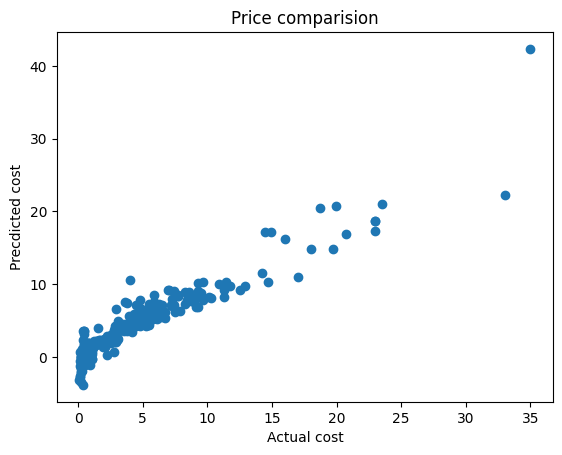

In [50]:
plt.scatter(Y_train,linear_model_prediction)
plt.xlabel("Actual cost")
plt.ylabel("Precdicted cost")
plt.title("Price comparision")
plt.show()

In the same way for train data we also must do for test data

In [52]:
linear_model_prediction_test=linear_reg.predict(X_test)
error_score=metrics.r2_score(Y_test,linear_model_prediction_test)
print(error_score)

0.3931106765727391


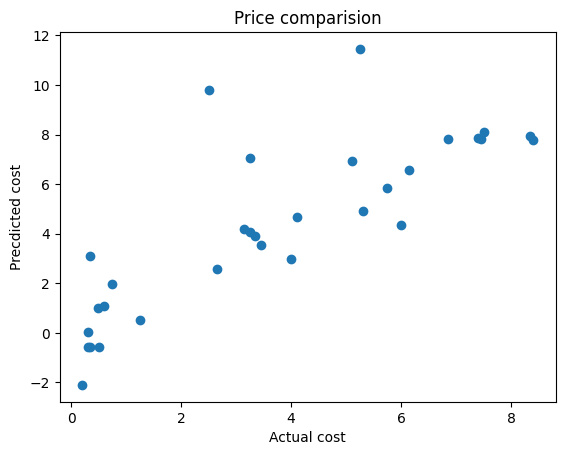

In [59]:
plt.scatter(Y_test,linear_model_prediction_test)
plt.xlabel("Actual cost")
plt.ylabel("Precdicted cost")
plt.title("Price comparision")
plt.show()

In [65]:
lasso_reg1=Lasso()
lasso_reg1.fit(X_train,Y_train)

Lasso()

Evaluating our model

In [67]:
lasso_model_prediction=lasso_reg1.predict(X_train)

In [68]:
error_score=metrics.r2_score(Y_train,lasso_model_prediction)

In [69]:
print("The error score is",error_score)

The error score is 0.8534437888277806


Vsiualizing our predicted and actual costs of the car

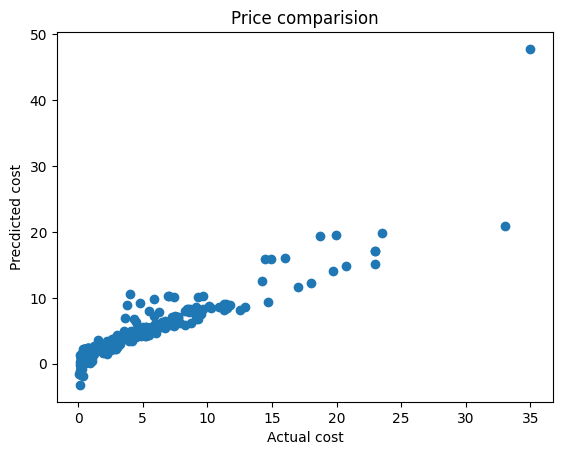

In [70]:
plt.scatter(Y_train,lasso_model_prediction)
plt.xlabel("Actual cost")
plt.ylabel("Precdicted cost")
plt.title("Price comparision")
plt.show()

In the same way for train data we also must do for test data

In [72]:
lasso_model_prediction_test=lasso_reg1.predict(X_test)
error_score=metrics.r2_score(Y_test,lasso_model_prediction_test)
print(error_score)

0.46123204958260644


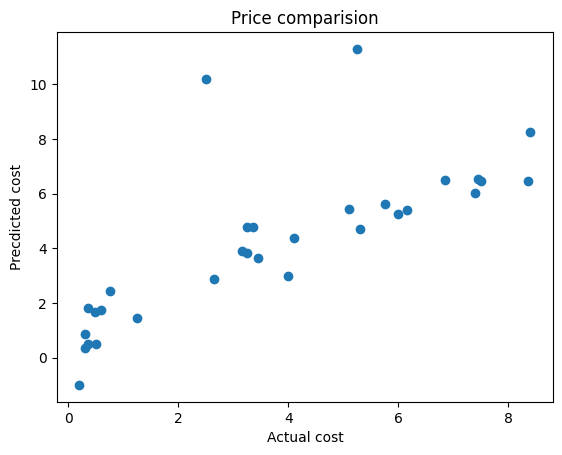

In [73]:
plt.scatter(Y_test,lasso_model_prediction_test)
plt.xlabel("Actual cost")
plt.ylabel("Precdicted cost")
plt.title("Price comparision")
plt.show()